In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics, tree, ensemble
from sklearn.model_selection import train_test_split

### Task 1

1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:
- small decision tree;
- deep decision tree;
- random forest on small trees;
- random forest on deep trees;

In [2]:
data = pd.read_csv("bioresponse.csv")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("Activity", axis=1),
                                                    data["Activity"],
                                                    test_size=0.3,
                                                    random_state=0)

In [4]:
small_tree = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
small_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [5]:
deep_tree = tree.DecisionTreeClassifier(max_depth=None, random_state=0)
deep_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [6]:
rf_small_trees = ensemble.RandomForestClassifier(max_depth=5, random_state=0)
rf_small_trees.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [7]:
rf_deep_trees = ensemble.RandomForestClassifier(max_depth=None, random_state=0)
rf_deep_trees.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

2. Calculate the following metrics to check the quality of your models:
- precision;
- recall;
- accuracy;
- F1-score;
- log-loss;

In [8]:
T = 0.5

In [9]:
def calculate_metrics(y_test: np.ndarray, y_pred: np.ndarray, T: float, model_alias: str) -> None:
    print(model_alias)
    print(f"precision_score: {metrics.precision_score(y_test, y_pred > T)}")
    print(f"recall_score: {metrics.recall_score(y_test, y_pred > T)}")
    print(f"accuracy_score: {metrics.accuracy_score(y_test, y_pred > T)}")
    print(f"f1_score: {metrics.f1_score(y_test, y_pred > T)}")
    print(f"log_loss: {metrics.log_loss(y_test, y_pred)}")

In [10]:
y_pred = small_tree.predict_proba(X_test)[:, 1]
calculate_metrics(y_test, y_pred, T, "small_tree")

small_tree
precision_score: 0.7727272727272727
recall_score: 0.7837837837837838
accuracy_score: 0.7504440497335702
f1_score: 0.7782162588792423
log_loss: 0.848157173804506


In [11]:
y_pred = deep_tree.predict_proba(X_test)[:, 1]
calculate_metrics(y_test, y_pred, T, "deep_tree")

deep_tree
precision_score: 0.7424960505529226
recall_score: 0.7472178060413355
accuracy_score: 0.7140319715808171
f1_score: 0.7448494453248812
log_loss: 9.877101539558048


In [12]:
y_pred = rf_small_trees.predict_proba(X_test)[:, 1]
calculate_metrics(y_test, y_pred, T, "random_forest_with_small_trees")

random_forest_with_small_trees
precision_score: 0.7768456375838926
recall_score: 0.7360890302066773
accuracy_score: 0.7344582593250444
f1_score: 0.7559183673469387
log_loss: 0.560316123391225


In [13]:
y_pred = rf_deep_trees.predict_proba(X_test)[:, 1]
calculate_metrics(y_test, y_pred, T, "random_forest_with_deep_trees")

random_forest_with_deep_trees
precision_score: 0.8138041733547352
recall_score: 0.8060413354531002
accuracy_score: 0.7886323268206039
f1_score: 0.8099041533546326
log_loss: 0.47285397421254477


3. Plot precision-recall and ROC curves for your models.

In [14]:
def draw_plots(y_test: list, y_pred: list, model_alias: str) -> None:
    plt.figure(figsize=(15, 5))

    prec, rec, thresh = metrics.precision_recall_curve(y_test, y_pred)
    ax = plt.subplot(1, 2, 1)
    ax.set_title(f"{model_alias} precision/recall/threshold plot")
    ax.plot(thresh, prec[:-1], label="precision")
    ax.plot(thresh, rec[:-1], label="recall")
    ax.set_xlabel("threshold")
    ax.legend()

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    ax = plt.subplot(1, 2, 2)
    ax.set_title(f"{model_alias} ROC curve")
    ax.plot(fpr, tpr)
    ax.set_xlabel("False positive rate")
    ax.set_ylabel("True positive rate")
    plt.show()

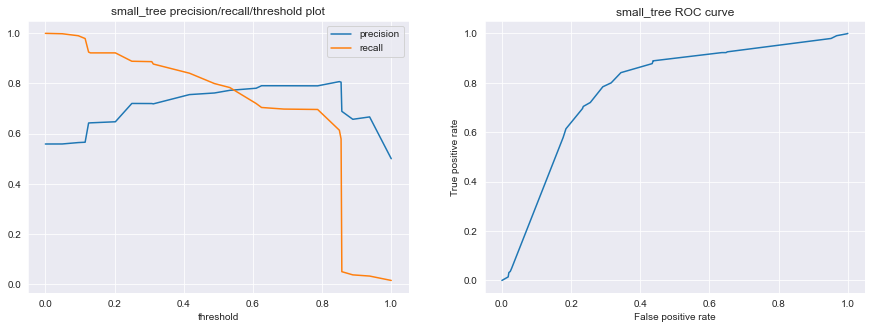

In [15]:
y_pred = small_tree.predict_proba(X_test)[:, 1]
draw_plots(y_test, y_pred, "small_tree")

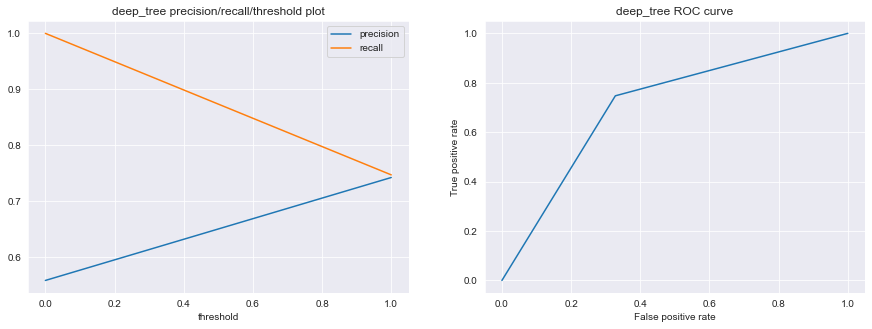

In [16]:
y_pred = deep_tree.predict_proba(X_test)[:, 1]
draw_plots(y_test, y_pred, "deep_tree")

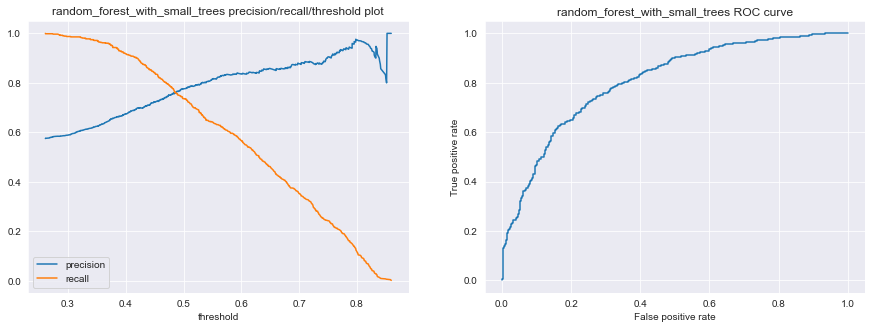

In [17]:
y_pred = rf_small_trees.predict_proba(X_test)[:, 1]
draw_plots(y_test, y_pred, "random_forest_with_small_trees")

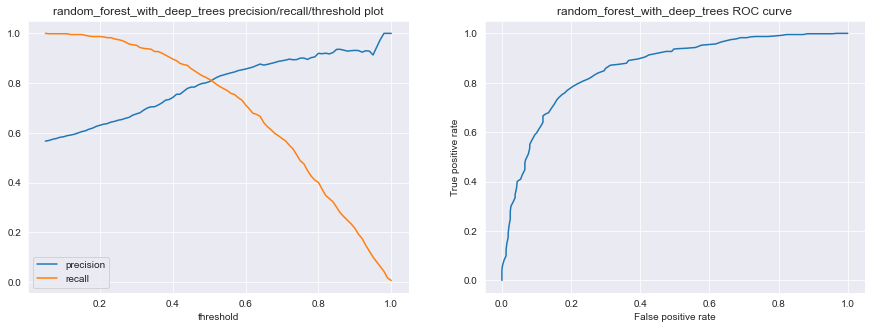

In [18]:
y_pred = rf_deep_trees.predict_proba(X_test)[:, 1]
draw_plots(y_test, y_pred, "random_forest_with_deep_trees")

4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics  from p.2 for it.

In [19]:
rf_avoid_fn_errors = ensemble.RandomForestClassifier(class_weight={0: 0.0000001, 1: 100000}, random_state=0)
rf_avoid_fn_errors.fit(X_train, y_train)
y_pred = rf_avoid_fn_errors.predict_proba(X_test)[:, 1]
calculate_metrics(y_test, y_pred, T, "random_forest_which_avoid_fn_errors")

random_forest_which_avoid_fn_errors
precision_score: 0.5711645101663586
recall_score: 0.9825119236883942
accuracy_score: 0.5781527531083481
f1_score: 0.722384570426651
log_loss: 3.619105025121102
